In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_pickle("dol_feature_2")

/home/yong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


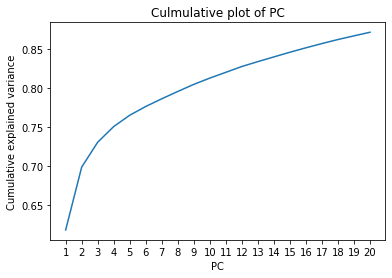

In [13]:
feature_col = ["feature {}".format(i) for i in range(1,514)]
df_X = df[feature_col]

for col in feature_col:
    df_X[col] = (df_X[col]-df_X[col].mean())/df_X[col].std()
X = df_X[feature_col].values
R = X.T @ X/(X.shape[0]-1)
eig_value, eig_vector = np.linalg.eig(R)
cumsum = np.cumsum(eig_value)/np.sum(eig_value)
fig, ax = plt.subplots()
ax.set_title("Culmulative plot of PC")
ax.set_xlabel("PC")
ax.set_ylabel("Cumulative explained variance")
ax.plot(range(1,21),cumsum[:20])
ax.set_xticks(range(1,21))

In [4]:
np.sum((eig_value/sum(eig_value)*100)[:20])

87.1108619822713

In [5]:
Z = X @ eig_vector[:,:20]
# for i in range(6):
#     Z[:,i] = (Z[:,i]-np.mean(Z[:,i]))/np.std(Z[:,i], ddof=1)

In [6]:
Y = df["target"].values
X_train, X_validation, Y_train, Y_validation = train_test_split(Z, Y, test_size=0.20, random_state=1, shuffle=True)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.797917 (0.029167)
LDA: 0.766667 (0.032342)
KNN: 0.864583 (0.040612)
CART: 0.829167 (0.037034)
NB: 0.692708 (0.028432)
SVM: 0.911458 (0.030636)


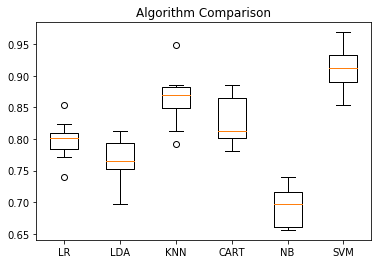

In [7]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [8]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [11]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.925
[[103  11]
 [  7 119]]
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       114
         1.0       0.92      0.94      0.93       126

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240

